In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score

# DATASET UPLOADING AND ANALYSIS


In [2]:
data = pd.read_csv("Wine quality dataset.csv")

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1598 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1598 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1598 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


In [5]:
data.shape

(1599, 12)

In [6]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    1
density                 0
pH                      1
sulphates               0
alcohol                 0
quality                 1
dtype: int64

In [7]:
data[data['total sulfur dioxide'].isna() | data['pH'].isna() | data['quality'].isna()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
9,7.5,0.50,0.36,6.1,0.071,17.0,NaN,0.9978,3.35,0.80,10.5,5.0
123,8.0,0.71,0.00,2.6,0.080,11.0,34.0,0.9976,3.44,0.53,9.5,NaN
184,6.7,0.62,0.21,1.9,0.079,8.0,62.0,0.9970,NaN,0.58,9.3,6.0


# Handling missing values


In [8]:
data.dropna(inplace = True)
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Data analysis and visualisation

In [9]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000
mean,8.321366,0.527666,0.271128,2.536936,0.087487,15.882206,46.431078,0.996745,3.498716,0.658189,10.424217,5.636591
std,1.742121,0.179154,0.194847,1.408341,0.047107,10.467380,32.893072,0.001889,0.080297,0.169587,1.066046,0.807963
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.520000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996745,3.520000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997842,3.520000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,3.900000,2.000000,14.900000,8.000000


<Axes: xlabel='quality', ylabel='citric acid'>

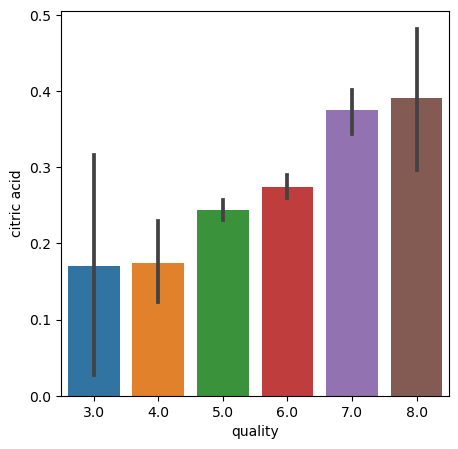

In [10]:
plot = plt.figure(figsize=(5, 5))
sns.barplot(x='quality', y = 'citric acid', data = data)

<Axes: xlabel='quality', ylabel='alcohol'>

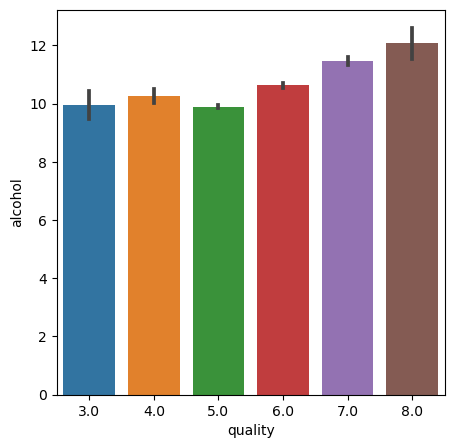

In [11]:
plot = plt.figure(figsize=(5, 5))
sns.barplot(x='quality', y = 'alcohol', data = data)


<Axes: xlabel='quality', ylabel='volatile acidity'>

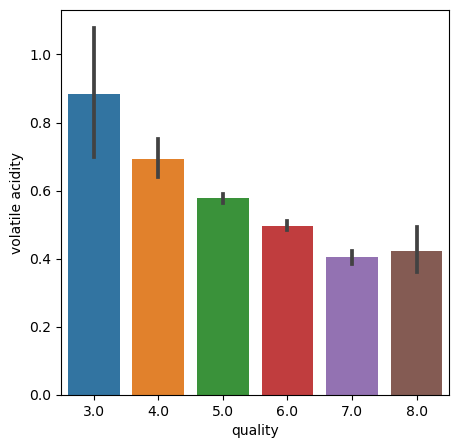

In [12]:
plot = plt.figure(figsize=(5, 5))
sns.barplot(x='quality', y = 'volatile acidity', data = data)

<Axes: >

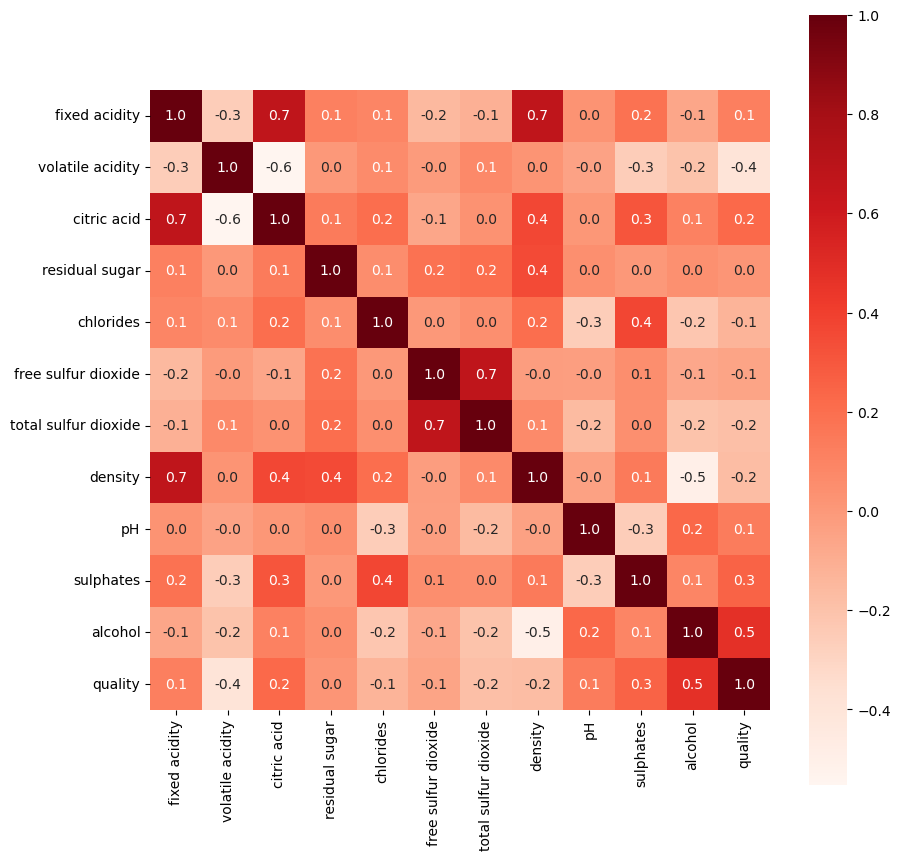

In [13]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), cbar=True, square=True, fmt= '.1f', annot=True, cmap = 'Reds')

# machine learning model

In [14]:
x = data.drop('quality', axis=1)
y = data['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)


In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=1)

In [16]:
model_rf = RandomForestClassifier(n_estimators = 500, min_samples_split = 3)
model_rf.fit(x_train, y_train)

RandomForestClassifier(min_samples_split=3, n_estimators=500)

In [17]:
def metrics(y_true, y_pred):
 print(f'RMSE: ', mean_squared_error(y_true, y_pred) ** 0.5)
 print(f'R_square value: ', r2_score(y_true, y_pred))

In [18]:
y_pred = model_rf.predict(x_test)
f1_score(y_test, y_pred, average = 'weighted')

0.9414063848889809

In [19]:
precision_score(y_test, y_pred, average = 'weighted')

0.9430462056303549

In [20]:
accuracy_rf = accuracy_score(y_test, y_pred) * 100
print('The accuracy is:', accuracy_rf,'%')

The accuracy is: 94.6875 %
